In [1]:
import os
from glob import glob

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from torch.utils.data import Dataset, DataLoader

import numpy as np
from PIL import Image

In [2]:
seed = 1

lr = 0.001
momentum = 0.5

batch_size = 64
test_batch_size = 64

epochs = 1
no_cuda = False
log_interval = 100

In [3]:
train_paths = glob('dataset/mnist_png/training/*/*.png')
test_paths = glob('dataset/mnist_png/testing/*/*.png')

len(train_paths), len(test_paths)

(60000, 10000)

# Preprocess

In [4]:
class Dataset(Dataset):
    def __init__(self, data_paths, transform=None):

        self.data_paths = data_paths
        self.transform = transform

    def __len__(self):
        return len(self.data_paths)

    def __getitem__(self, idx):
        path = self.data_paths[idx]
        image = Image.open(path).convert("L")
        label = int(path.split('\\')[-2])
        
        if self.transform:
            image = self.transform(image)

        return image, label

In [5]:
data_loader = torch.utils.data.DataLoader(
    Dataset(train_paths, 
            transforms.Compose([
                transforms.RandomHorizontalFlip(), 
                transforms.ToTensor(), 
                transforms.Normalize(
                    mean=[0.406], 
                    std=[0.225])])
           ),
    batch_size=batch_size, 
    shuffle=True
)

# Understand Better

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
path = '증명사진.png'

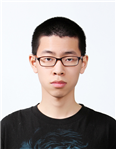

In [10]:
image = Image.open(path)
image

In [11]:
import torchvision

In [12]:
np.array(image).shape

(150, 117, 3)

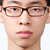

In [14]:
torchvision.transforms.CenterCrop(size=(50,50))(image)

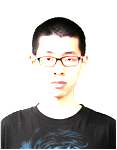

In [25]:
torchvision.transforms.ColorJitter(brightness=1, contrast=0, saturation=0, hue=0)(image)

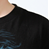

In [30]:
torchvision.transforms.FiveCrop(size=(50,50))(image)[3]

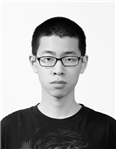

In [37]:
torchvision.transforms.Grayscale(num_output_channels=1)(image)

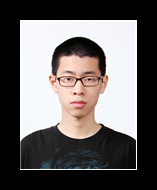

In [38]:
torchvision.transforms.Pad(padding=(20,20),fill=0, padding_mode="constant")(image)

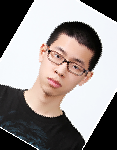

In [46]:
torchvision.transforms.RandomAffine(degrees=90, fillcolor=0)(image)

In [54]:
transforms = [torchvision.transforms.Grayscale(num_output_channels=1),
              torchvision.transforms.CenterCrop(size=(50,50)),
              torchvision.transforms.RandomAffine(degrees=90, fillcolor=255)]

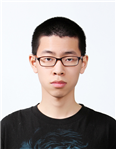

In [55]:
torchvision.transforms.RandomApply(transforms, p = 0.5)(image)

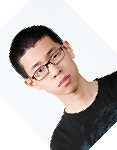

In [56]:
torchvision.transforms.RandomChoice(transforms)(image)

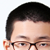

In [57]:
torchvision.transforms.RandomCrop(size=(50,50))(image)

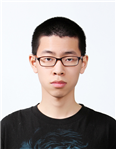

In [58]:
torchvision.transforms.RandomGrayscale(p=0.5)(image)

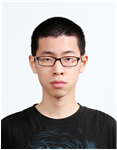

In [64]:
torchvision.transforms.RandomHorizontalFlip(p=0.5)(image)

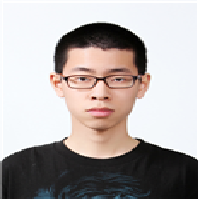

In [72]:
torchvision.transforms.Resize(size=(200,200),interpolation=Image.NEAREST)(image)

# Transform on Tensor

In [73]:
tensor = torchvision.transforms.ToTensor()(image)

In [74]:
trans = torchvision.transforms.Normalize(mean=(0,0,0), std=(1,1,1))(tensor)

In [79]:
np.min(image), np.max(image)

(0, 255)

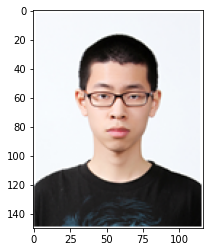

In [77]:
plt.imshow(trans.numpy().transpose(1,2,0))
plt.show()

In [80]:
np.min(trans.numpy()), np.max(trans.numpy())

(0.0, 1.0)

In [89]:
trans = torchvision.transforms.RandomErasing(p=0.5, scale=(0.02,0.33), ratio=(0.3, 3.3), value=0)(tensor)

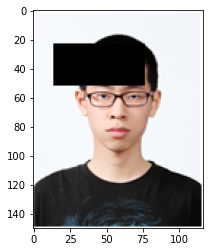

In [90]:
plt.imshow(trans.numpy().transpose(1,2,0))
plt.show()